Winfred Tibingana

2021/HD05/2313U | 2100702313

Data Visualization and Analysis | MSCS

# Field Attachment Feedback Analysis
Makerere University interns Field Supervisors have been placed in organizations of attachment overtime. Valuable feedback to the University about its students has been provided by the Field Supervisors. Unfortunately, this feedback is in form of *unstructured text and large in volume* making it difficult to process and gain useful insights.

In this notebook, text analysis tasks are performed on the dataset found [here](https://www.fams-cit.com/fscomments) to get valuable insights.

### Import Required Libraries

In [1]:
#import required libraries
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import en_core_web_sm
nlp = en_core_web_sm.load()

import matplotlib.pyplot as plt
%matplotlib inline

import nltk
nltk.download('punkt')
import pandas as pd
import numpy as np
import string
import re

#filter warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## 1. Create a corpus from dataset

Corpus: a collection of authentic text or audio (text written or audio spoken by a native of the language or dialect) organized into datasets. It is a collection of text on processing can be performed. A corpus can be made up of newspapers, novels, recipes, radio broadcasts to television shows, movies, and tweets.

In [2]:
#load the data
df = pd.read_excel("https://www.fams-cit.com/fscomments",sheet_name='Worksheet')
df.head(3)

,comment_id,Comment
0,5,djfjkdfjkjkffdk edited
1,41,Faith has exhibited enthusiasm in taking on th...
2,49,He now has now understood the structure of gra...


In [3]:
df.describe

<bound method NDFrame.describe of       comment_id                                            Comment
0              5                             djfjkdfjkjkffdk edited
1             41  Faith has exhibited enthusiasm in taking on th...
2             49  He now has now understood the structure of gra...
3             50  The Intern was oriented on ICT setup and Infra...
4             52  The student was oriented on the organization s...
...          ...                                                ...
5005        8187   The student performed the tasks to satisfaction.
5006        8188   The student performed the tasks to satisfaction.
5007        8189  Week 2, the student was trained on how to do Q...
5008        8208  The student is flexible and responsive to the ...
5009        8209  He has been involved in different Dstv commerc...

[5010 rows x 2 columns]>

In [4]:
# check the nan/ NA comments
df.Comment.isnull().sum(), df.shape

(1, (5010, 2))

In [5]:
#drop null rows
df = df.dropna()
df.shape

(5009, 2)

In [6]:
# check for duplicate comment
df.Comment.duplicated(keep="first").sum()

601

In [7]:
# dropping all the duplicates tweets and keeping the first values only
unique_comments_df = df.drop_duplicates(subset="Comment",keep="first")

In [8]:
unique_comments_df.shape

(4408, 2)

In [9]:
#data preparation
def clean_sentences(text):
    text = text.lower()  # convert comment to lowercase
    text = re.sub('\[.*\]','', text).strip() # Remove square brackets from comments
    text = re.sub('\(.*\)','', text).strip() # Remove brackets from comments
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    text = re.sub('\S*\d\S*\s*','', text).strip()  # Remove words containing numbers
    return text.strip()
  
unique_comments_df['comment_clean'] = unique_comments_df.Comment.apply(clean_sentences)
unique_comments_df.head()


,comment_id,Comment,comment_clean
0,5,djfjkdfjkjkffdk edited,djfjkdfjkjkffdk edited
1,41,Faith has exhibited enthusiasm in taking on th...,faith has exhibited enthusiasm in taking on th...
2,49,He now has now understood the structure of gra...,he now has now understood the structure of gra...
3,50,The Intern was oriented on ICT setup and Infra...,the intern was oriented on ict setup and infra...
4,52,The student was oriented on the organization s...,the student was oriented on the organization s...


### Stemming, Lemmatizing, Stopwords

**Stemming:** this is removing suffixes from words so as to end up with a word stem. Example: “likes”, “likely” and “liked” result in their common word stem “like” which can be used as a synonym for all three words.

**Lemmatization:** this is the process of reducing a word to its canonical or dictionary form. The process is similar to stemming but the root words have meaning

**Stopwords:** are words in any language which do not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. Examples of stopwords in the English language: this, the, to, is

In [10]:
#Stem, lemmatize and remove stopwords from comments

st = PorterStemmer()
stopwords = nlp.Defaults.stop_words

unique_comments_df['comment_stem'] = unique_comments_df.comment_clean.apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


def lemmatizer(text):
    doc = nlp(text)
    processed = [token.lemma_ for token in doc if not token.text in set(stopwords)] #also exclude stopwords
    return ' '.join(processed)

unique_comments_df['comment_lemma'] =  unique_comments_df.comment_clean.apply(lambda x: lemmatizer(x))
unique_comments_df.head()

,comment_id,Comment,comment_clean,comment_stem,comment_lemma
0,5,djfjkdfjkjkffdk edited,djfjkdfjkjkffdk edited,djfjkdfjkjkffdk edit,djfjkdfjkjkffdk edit
1,41,Faith has exhibited enthusiasm in taking on th...,faith has exhibited enthusiasm in taking on th...,faith ha exhibit enthusiasm in take on the pro...,faith exhibit enthusiasm take project hand sho...
2,49,He now has now understood the structure of gra...,he now has now understood the structure of gra...,he now ha now understood the structur of grail...,understand structure grail different component...
3,50,The Intern was oriented on ICT setup and Infra...,the intern was oriented on ict setup and infra...,the intern wa orient on ict setup and infrastr...,intern orient ict setup infrastructure soroti ...
4,52,The student was oriented on the organization s...,the student was oriented on the organization s...,the student wa orient on the organ structur de...,student orient organization structure develop ...


In [11]:
# generate a tokenized corpus of words from each comment
arr = []

for item in unique_comments_df.comment_lemma:
  tokenized_docs=[word_tokenize(item)]
  arr.append(tokenized_docs)

unique_comments_df['tokenized_corpus'] = np.array(arr)
unique_comments_df.head()

,comment_id,Comment,comment_clean,comment_stem,comment_lemma,tokenized_corpus
0,5,djfjkdfjkjkffdk edited,djfjkdfjkjkffdk edited,djfjkdfjkjkffdk edit,djfjkdfjkjkffdk edit,"[djfjkdfjkjkffdk, edit]"
1,41,Faith has exhibited enthusiasm in taking on th...,faith has exhibited enthusiasm in taking on th...,faith ha exhibit enthusiasm in take on the pro...,faith exhibit enthusiasm take project hand sho...,"[faith, exhibit, enthusiasm, take, project, ha..."
2,49,He now has now understood the structure of gra...,he now has now understood the structure of gra...,he now ha now understood the structur of grail...,understand structure grail different component...,"[understand, structure, grail, different, comp..."
3,50,The Intern was oriented on ICT setup and Infra...,the intern was oriented on ict setup and infra...,the intern wa orient on ict setup and infrastr...,intern orient ict setup infrastructure soroti ...,"[intern, orient, ict, setup, infrastructure, s..."
4,52,The student was oriented on the organization s...,the student was oriented on the organization s...,the student wa orient on the organ structur de...,student orient organization structure develop ...,"[student, orient, organization, structure, dev..."


## 2. Cluster the comments of Field Supervisors into categories: Excellent, Good, Neutral, Poor, Very Poor.

### k-Means Clustering with TD-IDF Approach
**Term Frequency-Inverse Document Frequency (TF-IDF)** is a numerical statistic that demonstrates how important a word is to a corpus.

**k-means clustering** is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean

In [12]:
#drop first row of dataframe to avoid unwanted dimensions
custering_df = unique_comments_df.iloc[1: , :]

In [13]:
custering_df.head()

,comment_id,Comment,comment_clean,comment_stem,comment_lemma,tokenized_corpus
1,41,Faith has exhibited enthusiasm in taking on th...,faith has exhibited enthusiasm in taking on th...,faith ha exhibit enthusiasm in take on the pro...,faith exhibit enthusiasm take project hand sho...,"[faith, exhibit, enthusiasm, take, project, ha..."
2,49,He now has now understood the structure of gra...,he now has now understood the structure of gra...,he now ha now understood the structur of grail...,understand structure grail different component...,"[understand, structure, grail, different, comp..."
3,50,The Intern was oriented on ICT setup and Infra...,the intern was oriented on ict setup and infra...,the intern wa orient on ict setup and infrastr...,intern orient ict setup infrastructure soroti ...,"[intern, orient, ict, setup, infrastructure, s..."
4,52,The student was oriented on the organization s...,the student was oriented on the organization s...,the student wa orient on the organ structur de...,student orient organization structure develop ...,"[student, orient, organization, structure, dev..."
5,53,Activities well completed,activities well completed,activ well complet,activity complete,"[activity, complete]"


In [14]:
#top used words
Top_Words_Count = pd.Series(' '.join(custering_df.comment_lemma).split()).value_counts()[:10]
print ("Top Count Words Used")
print(Top_Words_Count)

Top Count Words Used
task            916
week            869
internship      822
work            760
good            726
complete        680
challenge       648
skill           551
successfully    535
encourage       517
dtype: int64


In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer

# convert to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(min_df=0.01, max_df=0.95, max_features = None, ngram_range=(2,3)
      , analyzer='word', stop_words='english')
transformed_tfidf_array = vectorizer.fit_transform(custering_df.comment_lemma)

# tf_idf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
#tf_idf


In [117]:
#Apply k means clustering
from sklearn.cluster import MiniBatchKMeans

num_clusters = 5
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters, n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmeans = kmeans_model.fit(transformed_tfidf_array)
kmeans_clusters = kmeans.predict(transformed_tfidf_array)
kmeans_distances = kmeans.transform(transformed_tfidf_array)
sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i)
    for j in sorted_centroids[i, :20]:
        print(' %s' % terms[j])
    print()

Cluster 0:
 good work
 look forward
 learn new
 task assign
 code challenge
 task complete
 remote server
 plan movement
 message app
 good progress
 complete task
 start internship
 contact lead
 mobile app
 io command
 layer device
 lead developer
 main task
 trainer incase
 internship stratcom

Cluster 1:
 end internship report
 internship report
 end internship
 internship report explain
 report explain
 skill acquire
 explain new skill
 explain new
 report explain new
 new skill acquire
 new skill
 internship suppose
 finish internship
 write end internship
 write end
 present end internship
 present end
 finish internship suppose
 suppose present end
 suppose present

Cluster 2:
 equip handson
 equip handson skill
 handson skill
 internship equip
 internship equip handson
 start internship equip
 skill practical competence
 practical competence
 skill practical
 handson skill practical
 start internship
 practical competence week
 competence week
 week internship
 complete week
 

### Evaluate Model Performance

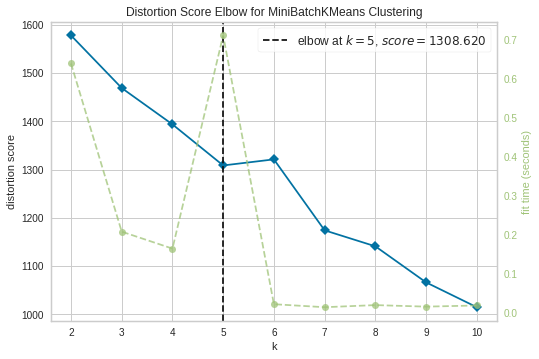

In [119]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

elb_visualizer = KElbowVisualizer(kmeans_model, k=(2,11))
elb_visualizer.fit(transformed_tfidf_array)    
elb_visualizer.show()  

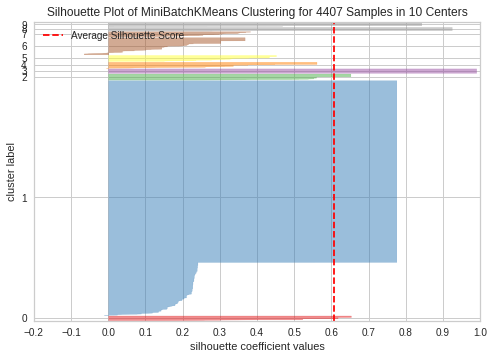

In [121]:
# Silhouette Analysis

sil_visualizer = SilhouetteVisualizer(kmeans_model)
sil_visualizer.fit(transformed_tfidf_array)    
sil_visualizer.show()

### VADER Approach
VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.

The sentiment score of a text can be obtained by summing up the intensity of each word in the text.

In [18]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 8.0 MB/s 


In [19]:
#create dataframe for sentiment analysis

sentiment_df = unique_comments_df[['Comment','comment_clean']].copy()
sentiment_df.head()

,Comment,comment_clean
0,djfjkdfjkjkffdk edited,djfjkdfjkjkffdk edited
1,Faith has exhibited enthusiasm in taking on th...,faith has exhibited enthusiasm in taking on th...
2,He now has now understood the structure of gra...,he now has now understood the structure of gra...
3,The Intern was oriented on ICT setup and Infra...,the intern was oriented on ict setup and infra...
4,The student was oriented on the organization s...,the student was oriented on the organization s...


In [20]:
#add scores to comments
sid_obj = SentimentIntensityAnalyzer()
sentiment_df['sentiment_scores'] = sentiment_df.Comment.apply(sid_obj.polarity_scores)

sentiment_df.head()

,Comment,comment_clean,sentiment_scores
0,djfjkdfjkjkffdk edited,djfjkdfjkjkffdk edited,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,Faith has exhibited enthusiasm in taking on th...,faith has exhibited enthusiasm in taking on th...,"{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'comp..."
2,He now has now understood the structure of gra...,he now has now understood the structure of gra...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,The Intern was oriented on ICT setup and Infra...,the intern was oriented on ict setup and infra...,"{'neg': 0.047, 'neu': 0.884, 'pos': 0.069, 'co..."
4,The student was oriented on the organization s...,the student was oriented on the organization s...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [21]:
sentiment_df['compound_score']  = sentiment_df.sentiment_scores.apply(lambda score_dict: score_dict['compound'])
sentiment_df.head()

,Comment,comment_clean,sentiment_scores,compound_score
0,djfjkdfjkjkffdk edited,djfjkdfjkjkffdk edited,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,Faith has exhibited enthusiasm in taking on th...,faith has exhibited enthusiasm in taking on th...,"{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'comp...",0.8910
2,He now has now understood the structure of gra...,he now has now understood the structure of gra...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,The Intern was oriented on ICT setup and Infra...,the intern was oriented on ict setup and infra...,"{'neg': 0.047, 'neu': 0.884, 'pos': 0.069, 'co...",0.2023
4,The student was oriented on the organization s...,the student was oriented on the organization s...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [122]:
#function to categorize comments
def sentence_sentiment(sentence):
 
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)

    if 0.85 <= sentiment_dict['compound'] <=  1:
        return 'Excellent'
        
    elif 0.05 < sentiment_dict['compound'] < 0.85 :
      return "Good"

    elif -0.70 <= sentiment_dict['compound'] < -0.05 :
        return "Poor"
  
    elif -1 <= sentiment_dict['compound'] < - 0.70 :
        return "Very Poor"
 
    else :
        return "Neutral" 


In [123]:
# sentiment_df["sentence_sentiment"]= unique_comments_df.comment_lemma.apply(sentence_sentiment)
sentiment_df["sentence_sentiment"] = sentiment_df.Comment.apply(sentence_sentiment)
sentiment_df.head()

,Comment,comment_clean,sentiment_scores,compound_score,sentence_sentiment
0,djfjkdfjkjkffdk edited,djfjkdfjkjkffdk edited,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,Faith has exhibited enthusiasm in taking on th...,faith has exhibited enthusiasm in taking on th...,"{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'comp...",0.8910,Excellent
2,He now has now understood the structure of gra...,he now has now understood the structure of gra...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3,The Intern was oriented on ICT setup and Infra...,the intern was oriented on ict setup and infra...,"{'neg': 0.047, 'neu': 0.884, 'pos': 0.069, 'co...",0.2023,Good
4,The student was oriented on the organization s...,the student was oriented on the organization s...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


In [124]:
#quick summary of category counts
sentiment_df["sentence_sentiment"].value_counts()

Good         2945
Neutral       785
Excellent     385
Poor          290
Very Poor       3
Name: sentence_sentiment, dtype: int64

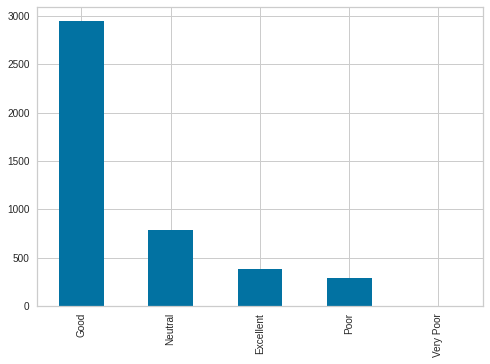

In [132]:
# plot bar graph
sentiment_df.sentence_sentiment.value_counts().plot(kind='bar')
plt.show()

In [134]:
sentiment_df.to_csv('vader_comment_sentiments.csv')

## 3. Create a Named Entity Recognition (NER) model
NER Model that takes in a comment as an input and outputs the Entities, if any, belonging to the categories: **Person, Organization, Place/Location, Time**

**NER** is a sub-task of information extraction that seeks to locate and classify named entities mentioned in unstructured text into predefined categories 

In [135]:
import spacy
from spacy import displacy 

In [136]:
# en_core_web_sm: small English pipeline trained on written web text (blogs, news, comments), that includes vocabulary, syntax and entities
nlps = spacy.load("en_core_web_sm")

In [137]:
# NER model function
def NER_model_ftn(comment):
  entity_list = []
  doc = nlps(comment)

  for ent in doc.ents:
    if ent.label_ in ('PERSON','ORG', 'LOC','DATE','TIME', ):
      entity_list.append([ent.text, ent.label_]) #ent.start_char, ent.end_char,
  return entity_list


In [138]:
# call function
for item in unique_comments_df.Comment[:50]:
  if not NER_model_ftn(item):
    continue
  else:
    print(NER_model_ftn(item), " :", item)

[['API', 'ORG'], ['MTN', 'ORG']]  : He now has now understood the structure of grails and how different components relate. Understands the process of getting API's from MTN
[['ICT', 'ORG'], ['Infrastructure of Soroti University', 'ORG'], ['Internship', 'ORG'], ['Internship', 'ORG']]  : The Intern was oriented on ICT setup and Infrastructure of Soroti University, drafted workplan and started off the Internship. Simon was encouraged to take the Internship seriously as there was a lot to learn.
[['the 4 week', 'DATE']]  : The student was oriented on the organization structure, developed workplan for the 4 week internship and participated in assessment of printers for servicing.  He acquired both technical and teamwork skills at workplace.
[['weekly', 'DATE']]  : The student's weekly progress was justifiably good, characterized with enthusiasm to learning more.
[['Steven', 'PERSON']]  : Partially done, expected a better result based on Steven's experienced. More effort needed ...
[['Mahad'

In [139]:
# visualize sentence with entities
sentence = "this week had good development momentum no issues from me"
# sample_sentence = nlps(sentence) 

# displacy.serve(sample_sentence, style="ent")

## 4. Visualization

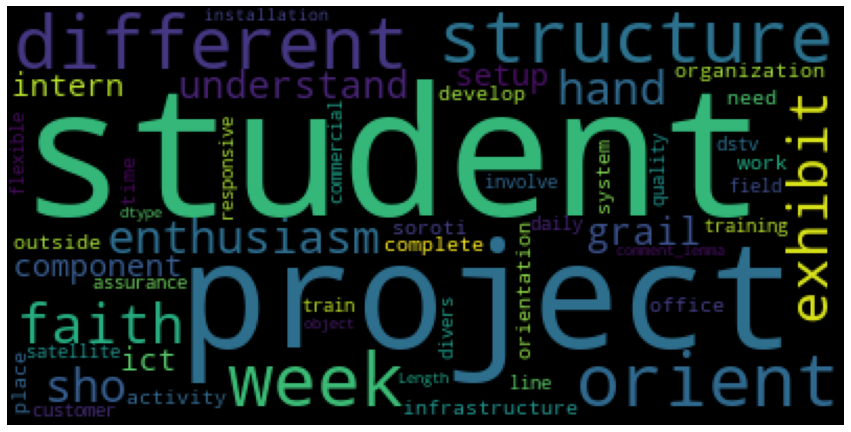

In [140]:
# Visualize words by frequency using a word cloud

# !pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=stopwords,max_words=500).generate(str(custering_df.comment_lemma))

# print(wordcloud)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [141]:
# N-grams are continuous sequences of words or symbols or tokens in a document.
# Find the top unigrams,bigrams and trigrams by frequency
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def get_top_ngrams(text, ngram=1, top=None):
    vec = CountVectorizer(ngram_range=(ngram, ngram), stop_words='english').fit(text)
    bag_of_words = vec.transform(text)

    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top]

In [142]:
top_20_unigrams = get_top_ngrams(unique_comments_df.comment_clean,ngram=1, top=20)
top_20_bigrams = get_top_ngrams(unique_comments_df.comment_clean,ngram=2, top=20)
top_20_trigrams = get_top_ngrams(unique_comments_df.comment_clean,ngram=3, top=20)

# move ngrams to csv
csv_df1 = pd.DataFrame(top_20_unigrams)
csv_df1['type'] = "unigram"
csv_df1.to_csv('ngrams.csv', mode='a', index=False)

csv_df2 = pd.DataFrame(top_20_bigrams)
csv_df2['type'] = "bigrams"
csv_df2.to_csv('ngrams.csv', mode='a', index=False, header=False)

csv_df3 = pd.DataFrame(top_20_trigrams)
csv_df3['type'] = "trigrams"
csv_df3.to_csv('ngrams.csv', mode='a', index=False, header=False)

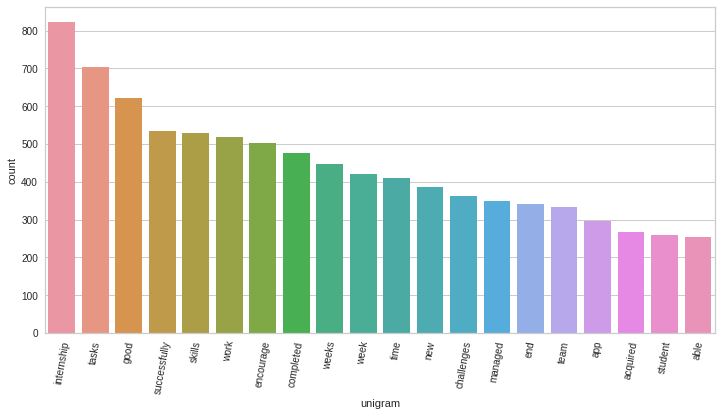

In [143]:
import seaborn as sns

#Plot graph for the top 30 words in the unigram frequency
df1 = pd.DataFrame(top_20_unigrams, columns = ['unigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df1['unigram'], y=df1['count'])
plt.xticks(rotation = 80)
plt.show()

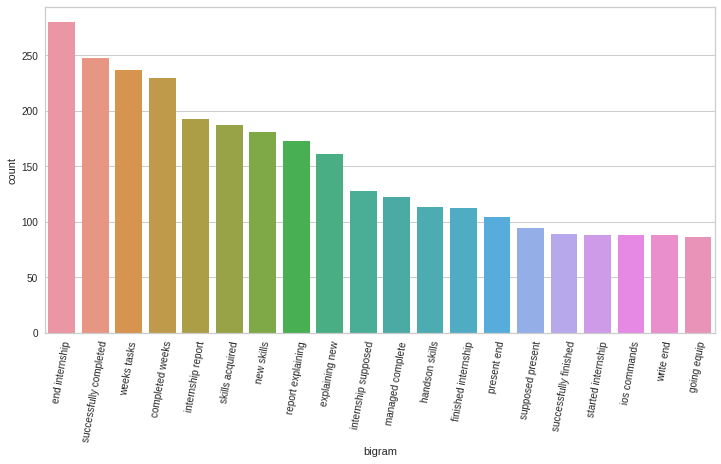

In [144]:
df2 = pd.DataFrame(top_20_bigrams, columns = ['bigram' , 'count'])
plt.figure(figsize=(12,6))
fig2 = sns.barplot(x=df2['bigram'], y=df2['count'])
plt.xticks(rotation = 80)
plt.show()

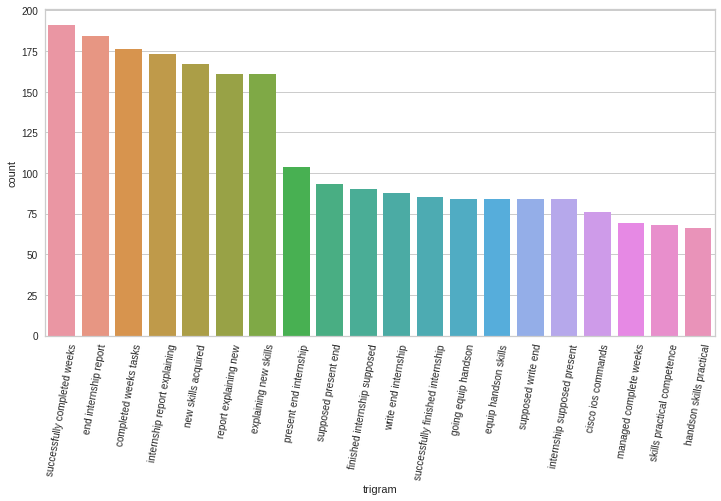

In [145]:
df3 = pd.DataFrame(top_20_trigrams, columns = ['trigram' , 'count'])
plt.figure(figsize=(12,6))
fig3 = sns.barplot(x=df3['trigram'], y=df3['count'])
plt.xticks(rotation = 80)
plt.show()
